# [scikit-learn](https://scikit-learn.org/stable/user_guide.html) 入門
---

+ オープンソースの機械学習ライブラリ
+ (2007年) Google Summer of Code projectとしてDavid Cournapeau氏によって開発
+ Numpy、SciPy、matplotlibといったPythonのライブラリ上で動作
+ 手軽に機械学習の 前処理、 モデリング、 評価指標算出 
+ アルゴリズムが豊富
> ![img](https://www.codexa.net/wp-content/uploads/2020/09/スクリーンショット-2020-09-29-11.20.30.png)
> 公式には使用マップがある！(アルゴリズムチートシート)

cf. [scikit-learn 入門：6つの機能と分類・回帰の実装方法を徹底解説！](https://www.codexa.net/scikit-learn-intro/)


In [1]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [2]:
!pip install sklearn

     |████████████████████████████████| 7.2 MB 601 kB/s eta 0:00:01
     |████████████████████████████████| 301 kB 524 kB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [3]:
import sklearn 
import pandas as pd
from sklearn.datasets import load_iris, load_boston
# アヤメ(iris)のデータセットと、ボストンの住宅価格のデータセットをインポート

## 分類
> sepal:がく petal:花弁（花びら）
>
> がくと花弁それぞれの長さと幅から、アヤメの種類を当てる分類問題を解くためのデータセット

In [6]:
# i) irisデータセットの読込
iris = load_iris()

# ii) 特微量をデータフレームに格納して簡易表示
iris_features = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# iii) 特微量の基本統計量を確認
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# iv) 特微量の欠損値数の確認
iris_features.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [14]:
# v) ラベルを確認 （シリーズに格納、ラベル毎のデータ数表示）
iris_label = pd.Series(iris.target)
iris_label.value_counts()

2    50
1    50
0    50
dtype: int64

In [15]:
#(データセットの中身が確認できたので)

# vi) 訓練データ と テストデータ に分割
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(
    iris_features, iris_label, test_size=0.5, random_state=0)

In [140]:
# 学習データとテストデータの構造確認
print(features_train.shape)
print(label_train.shape)
print(features_test.shape)
print(label_test.shape)

# 特徴量:75行4列 ラベル:75行1列

(253, 13)
(253,)
(253, 13)
(253,)


![img](https://www.codexa.net/wp-content/uploads/2020/10/スクリーンショット-2020-10-02-17.15.04.png)
> START→Yes→Yes→Yes→Yes
>
> 「Linear SVC」が推奨（サポートベクターマシン）

In [24]:
# vii) モジュールをインポートし、LinearSVCクラスのインスタンスを作成、fitメソッドで学習
from sklearn import svm

# LinearSVC インスタンス作成
# (データ分割と同様)何回やっても、どの環境で実行しても結果が同じになるように、インスタンス作成時にrandom_state引数を指定
Linsvc = svm.LinearSVC(random_state=0, max_iter=3000)

# LinearSVC データ学習
Linsvc.fit(features_train, label_train)

LinearSVC(max_iter=3000, random_state=0)

In [25]:
# (モデルにデータを学習させたので)

# viii) アヤメ:iris の種類を予測
label_pred_linsvc = Linsvc.predict(features_test)
print(label_pred_linsvc)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 2 1 2 2 2 2 1 2 2 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


(以上)無事に予測完了

---

チートシート上で　```LinearSVC```がうまく予測できない場合に推奨されている
+ ```K近傍法(Kneighbor)```
+ ```ロジスティック回帰モデル（LogisticRegression）```（オーソドックスな分類手法）

以下それぞれ分類予測

In [27]:
# K近傍法　モジュールインストール
from sklearn.neighbors import KNeighborsClassifier

# K近傍法　インスタンス作成
Kneighbor = KNeighborsClassifier(n_neighbors=5)

# K近傍法　データ学習
Kneighbor.fit(features_train, label_train)

# K近傍法　種類予測
label_pred_KNeighbor = Kneighbor.predict(features_test)
print(label_pred_KNeighbor)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [33]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰　インスタンス作成
LogReg = LogisticRegression(random_state=0)

# ロジスティック回帰　データ学習
LogReg.fit(features_train, label_train)

# ロジスティック回帰　種類予測
label_pred_LogReg = LogReg.predict(features_test)
print(label_pred_LogReg)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


3つのモデルで予測ができたので、今度はそれぞれの予測モデルの性能を比較。

---

評価指標として、今回は```正解率(accuracy)```を用い、```混同行列```と併せて表示。 
+ 正解率: 全ての予測のうち、正しく分類できていた予測の割合を表示
+ 混同行列: 実際のラベルと予測のラベルを行列形式で表示

In [39]:
# LinearSVM予測　混同行列　正解率
from sklearn.metrics import confusion_matrix
print('confusion matrix  = \n', confusion_matrix(y_true=label_test, y_pred=label_pred_linsvc))
print('accurary =', Linsvc.score(features_test, label_test))

confusion matrix  = 
 [[21  0  0]
 [ 0 25  5]
 [ 0  1 23]]
accurary = 0.92


In [42]:
# K近傍法予測　混同行列　正解率
from sklearn.metrics import confusion_matrix
print('confusion matrix  = \n', confusion_matrix(y_true=label_test, y_pred=label_pred_KNeighbor))
print('accurary =', Kneighbor.score(features_test, label_test))

confusion matrix  = 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
accurary = 0.96


In [43]:
# ロジスティック回帰モデル予測　混同行列　正解率
from sklearn.metrics import confusion_matrix
print('confusion matrix  = \n', confusion_matrix(y_true=label_test, y_pred=label_pred_LogReg))
print('accurary =', LogReg.score(features_test, label_test))

confusion matrix  = 
 [[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
accurary = 0.9333333333333333


## 回帰

In [44]:
boston = load_boston()

# i) 特徴量データフレームに格納
boston_features = pd.DataFrame(data=boston.data, columns=boston.feature_names)

boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


> 
> + CRIM  : 町の人口あたり犯罪率
> + ZN    : 25000平方フィート以上の住宅地の割合
> + INDUS : 町ごとの非小売業の土地の割合
> + CHAS  : Charles川に関するダミー変数(川に接していたら1、そうでなければ0)
> + NOX   : 一酸化窒素濃度（1000万分の1）
> + RM    : 住居当たりの平均部屋数
> + AGE   : 1940年より前に建設された物件の割合
> + DIS   : ボストンの5つの雇用センターまでの重み付けされた距離
> + RAD   : 放射状高速道路へのアクセスしやすさ
> + TAX   : 10000ドル当たりの固定資産税総額
> + PTRATIO: 町ごとの生徒と教師の比率
> + B     : 1000(Bk – 0.63)^2 ※Bkは町の黒人比率
> + LSTAT : 低所得の人々の割合
>

In [45]:
boston_features.describe()    # 特徴量の基本統計量を確認

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [46]:
boston_features.isnull().sum()    # 特徴量の欠損値確認

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [47]:
# ii) ターゲットをpandasのSeriesというデータ構造に格納
boston_target = pd.Series(data=boston.target)

boston_target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [55]:
# iii) 学習データ(訓練データ)　テストデータ　に分割
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(boston_features, boston_target, test_size=0.5, random_state=0)

> ![img](https://www.codexa.net/wp-content/uploads/2020/10/スクリーンショット-2020-10-02-17.16.29.png)
> START→Yes→No→Yes→Yes

> few features should be important(少数の特徴量が重要である)

> この質問に関しては、データを確認しただけでは判断がつかない...Yes No それぞれ実装

> + ```Lasso```
> + ```RidgeRegression```

In [56]:
# Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.1, random_state=0)    # インスタンス作成
Lasso.fit(features_train, target_train)    # 学習
target_pred_Lasso = Lasso.predict(features_test)    # 予測
print(target_pred_Lasso)

[24.92016544 24.37622341 28.73960915 12.65498587 20.12822066 20.278054
 20.95011001 21.70953097 19.33986144 19.76993978  5.2619872  15.01342281
 18.55060734  5.14910083 40.88235725 32.82536693 22.02311106 36.97949949
 31.39580121 23.37184357 25.00361915 24.96795955 19.91563456 30.413859
 21.81020632 10.75569666 17.47625276 22.31335423 34.73258421 19.92547932
 17.7296372  19.46532614 19.04038153 22.70199974 28.48412881 21.34836541
 10.64171141 25.65179112 16.72496679 13.66075877 25.616441   19.73714296
 22.02373819 14.67513692 23.37737951 24.41194578 18.21764789 26.58215541
 12.38733835 24.26839401 24.83350403 17.88968114 23.78701489 30.59748917
 14.04863284 21.42971232 20.4370754  14.65041284 14.15350119 20.05664239
 18.44037773 21.76402304 32.97351102 31.87895694 17.65296813 32.92082893
 19.72010474 18.21955219 17.78977064 22.91306219 21.3313637  23.19983381
 31.19722097 30.26343896 25.65488982  4.40093688 36.7227301  23.38754183
 26.84605697 19.75879492 28.12397051 19.99664244 19.833

In [59]:
# RidgeRegression
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5, random_state=0)    # インスタンス作成
Ridge.fit(features_train, target_train)    # 学習
target_pred_Ridge = Ridge.predict(features_test)    # 予測
print(target_pred_Ridge)

[24.80360943 24.73539403 30.39780122 12.40553362 20.79803971 19.40388955
 21.18214301 20.99565887 19.02426418 19.99879681  5.36368389 16.21808903
 17.93509271  5.05178706 42.65517908 32.94679998 22.78240002 37.37457445
 31.20174003 23.01044247 24.69486913 25.35061009 20.08583937 30.62107128
 21.81051138 11.07453103 17.03360027 20.36448845 35.19824057 20.31916718
 18.27284982 18.76847174 19.03135313 23.14224138 28.75382621 21.69617143
 10.68363849 26.98612597 17.74210481 14.72099602 26.10056456 19.84916569
 21.91301663 15.41364384 22.76364783 24.53280879 18.95001075 26.00977557
 10.66191027 24.22559263 24.34162346 17.26895079 23.97355545 30.04081602
 13.86711888 21.24051043 20.35188734 14.30903014 14.90674153 21.97960649
 17.58350061 21.40501834 33.26780334 31.69113278 18.02957703 33.33149629
 19.33748019 18.37075237 18.88335454 22.80962814 22.29273219 23.82481841
 31.36615247 29.65358093 26.46411679  4.37177305 36.91933075 23.43689537
 26.88842557 19.28277885 28.38138273 19.80757983 19

In [61]:
# Cf.線形回帰
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(features_train, target_train)
target_pred_LinReg = LinReg.predict(features_test)
print(target_pred_LinReg)

[24.70960325 25.12631354 30.76503263 12.41405512 21.29599499 18.9820552
 21.41132996 20.67952823 19.00064129 20.20283837  5.56400169 16.92323348
 17.51322896  5.16858442 42.95215092 32.9806573  23.36140299 37.62826682
 31.09206869 22.89283336 24.57289742 25.81536634 20.26467062 30.79131551
 21.95868456 11.79141163 16.88663056 19.19534708 35.40278965 20.65291048
 18.68119761 18.36807058 19.23453044 23.58815977 29.06218826 21.12413253
 10.68515822 27.15483771 18.39065879 15.3858284  26.49125897 19.99603848
 21.88280039 16.08194711 22.40800324 24.76641999 19.58660105 24.79000679
  9.59564604 24.21884557 23.12098756 16.80153308 24.24031563 29.42927442
 13.851603   21.15932546 20.39800177 14.21419815 15.6911474  22.4954085
 17.15556137 21.23238059 33.42098655 31.5832431  18.3631319  33.63873423
 19.03143924 18.53466863 19.51152135 22.78181836 23.02677155 24.29954349
 31.56802819 29.23584248 27.05755582  4.38763735 36.91142859 23.52551148
 26.99615168 19.06117058 28.61936286 19.70539962 20.2

In [63]:
# （３モデルの予測が出揃ったので）

# 評価指標
# （決定係数：「実際の値のうち予測モデルで説明できた割合」を表す評価指標で０〜１の範囲で変動）

# ① Lassoモデルによる回帰の評価（決定係数の表示）
print('R-squared : ', Lasso.score(features_test, target_test))
# ② Ridgeモデルによる回帰の評価（決定係数の表示）
print('R-squared : ', Ridge.score(features_test, target_test))
# Cf. ③ 線形回帰モデルによる回帰の評価（決定係数の表示）
print('R-squared : ', LinReg.score(features_test, target_test))

R-squared :  0.6537204778207004
R-squared :  0.6625759807022442
R-squared :  0.6662719929919441


モデル間で性能に大差はないという結果に。

線形モデルが最も性能が良かったですが、チートシートにしたがって用いた二つのモデルもまずまずの性能を出せたと言える.

---

## モデルの評価と選択

+ 混同行列
+ クロスバリデーション（交差検証):
>データセットを訓練データとテストデータに分割してモデルに学習させてスコアを出すというプロセスを複数回繰り返し、全てのスコアの平均で性能を測る

In [66]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

# データセットをランダムに５分割するための変数定義
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# ① Lasso
# cv を用いてクロスバリデーション実行
score = cross_val_score(Lasso, boston_features, boston_target, cv=cv)
print(score)
print('R-squared_Average : {0:.2f}'.format(score.mean()))

[0.55697477 0.65577592 0.59410602 0.78246293 0.78063311]
R-squared_Average : 0.67


In [67]:
# ② Ridge
# cv を用いてクロスバリデーション実行
score = cross_val_score(Ridge, boston_features, boston_target, cv=cv)
print(score)
print('R-squared_Average : {0:.2f}'.format(score.mean()))

[0.58364982 0.67498977 0.62322026 0.79457322 0.77713899]
R-squared_Average : 0.69


In [68]:
# ③ LinReg
# cv を用いてクロスバリデーション実行
score = cross_val_score(LinReg, boston_features, boston_target, cv=cv)
print(score)
print('R-squared_Average : {0:.2f}'.format(score.mean()))

[0.58922238 0.67790515 0.62474713 0.79455314 0.7751921 ]
R-squared_Average : 0.69


以上の結果から、今回の分類に関しては、Ridgeモデル、線形モデルの方がLassoモデルよりも優れていることを確認できました。

---

モデルの評価と選択のための手法は他にもあります。

## [ハイパーパラメータチューニング](https://www.codexa.net/hyperparameter-tuning-python/)(3手法)
> 少し乱暴な言い方をすると機械学習のアルゴリズムの「設定」
---

### 1. Grid Serach(グリッドサーチ)

> 与えられたハイパーパラメータの候補の値の全パターンのモデル構築を行う手法

> e.g. 設定Aと設定Bのハイパーパラメータを調整する場合、設定Aには「1、3、5」の値、設定Bには「True、False」の値を候補として指定(3×２＝全6回のモデル訓練が異なる設定の値で実行される)。

>【メリット】
調整する値の「あたり」が付いている場合は◎
調整する値の数が少ない場合は◎

>【デメリット】
モデル訓練回数が増えるので時間が掛かる
計算コストが非常に高い

### 2. Random Search(ランダムサーチ)

> 候補の値をランダムに組み合わせたモデル訓練を行いハイパーパラメータを検証する手法

> 例えば候補Aには10個の値、候補Bには5個、候補Cは30個の値があるとします。
グリッドサーチでは全組み合わせ1500回（10 x 5 x 30）のモデル訓練を行います。仮に1回の訓練で30分要するとした場合31日と現実的でないことに。。。そこでランダムサーチが役に立ちます。ランダムサーチで異なる組み合わせのハイパーパラメータを用いてモデル訓練を行い検証。

> 【メリット】
調整する値が多くても対応することが可能

> 【デメリット】
ランダムに検証するので「運任せ」の要素あり


### 3. Bayesian Optimization（ベイズ最適化）

> ベイズ最適化をざっくりと解説すると「前回の結果を基に次に調べる値を決めていく」手法。
（不確かさを利用して次に探索を行うべき値を探していく最適化アルゴリズムの一種。目的関数（Acquisition Function）を推定する代理モデル（Surrogate Model）にはガウス過程が用いられる）

> 2つの戦略を使って最適化を順次的実行
> + 「Exploration（探索）」
> + 「Exploitation（活用）」

> e.g. よく行く居酒屋で飲み物を選ぶ時を想像してみてください。先週来た時は泡盛を頼み、とても美味しいのを覚えています。今回も似たような泡盛を頼めば恐らく前回と同様に楽しめることが想像できます。これがExploitation（活用）です。しかしメニューには日本酒や焼酎など、今まで頼んだことが無い飲み物もたくさんあります。もしかすると泡盛よりも自分好みのお酒があるかもしれません。そこで今回は日本酒を頼んでみることにします。これがExploration（探索）


cf.[ハイパーパラメータとは？チューニングの手法を徹底解説（XGBoost編）](https://www.codexa.net/hyperparameter-tuning-python/)

In [75]:
!pip install xgboost

In [76]:
# i)　インポート
import pandas as pd

#Scikit-learn
from sklearn.model_selection import train_test_split #訓練、テストデータ分割
from sklearn.metrics import accuracy_score, confusion_matrix #正解率　混同行列
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# XGBoost
import xgboost as xgb

# Marplotlibのインライン表示
%matplotlib inline

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [77]:
!brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 5 taps (heroku/brew, homebrew/core, homebrew/cask, homebrew/cask-fonts and homebrew/services).
==> New Formulae
attr            docui           kcgi            php@7.4         tm
aws-console     duf             kubevela        t-rec           vc
aws-rotate-key  f3d             lua@5.3         tendermint      youtube-dlc
cairomm@1.14    inframap        magic_enum      terracognita    youtubedr
clash           json5           oakc            terraform@0.13
==> Updated Formulae
Updated 1253 formulae.
==> Renamed Formulae
now-cli -> vercel-cli
==> Deleted Formulae
curl-openssl               dtrx                       unrar
==> New Casks
anka-build-cloud-controller-and-registry
berrycast
blackhole-16ch
blackhole-2ch
bome-network
canva
clocker
coscreen
daedalus-catalyst
font-albertella
font-andika-new-basic
font-ballet
font-big-shoulders-inline-display
font-big-shoulders-inline-text
font-big-shoulders-stencil-display
font-big-shoulders-

In [78]:
# i)　インポート
import pandas as pd

#Scikit-learn
from sklearn.model_selection import train_test_split #訓練、テストデータ分割
from sklearn.metrics import accuracy_score, confusion_matrix #正解率　混同行列
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# XGBoost
import xgboost as xgb

# Marplotlibのインライン表示
%matplotlib inline

In [82]:
# ii) データフレームセット
df = pd.read_csv('../csv/HRDataset_v14.csv', index_col=['Employee_Name'])

#　必要なデータを列挙
df = df[['Termd', 'Position', 'Sex', 'MaritalDesc', 'RaceDesc', 
        'Department', 'ManagerName', 'RecruitmentSource', 
        'EngagementSurvey','EmpSatisfaction', 'SpecialProjectsCount', ]]
df.head()

,Termd,Position,Sex,MaritalDesc,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
Employee_Name,,,,,,,,,,,
"Adinolfi, Wilson K",0,Production Technician I,M,Single,White,Production,Michael Albert,LinkedIn,4.60,5,0
"Ait Sidi, Karthikeyan",1,Sr. DBA,M,Married,White,IT/IS,Simon Roup,Indeed,4.96,3,6
"Akinkuolie, Sarah",1,Production Technician II,F,Married,White,Production,Kissy Sullivan,LinkedIn,3.02,3,0
"Alagbe,Trina",0,Production Technician I,F,Married,White,Production,Elijiah Gray,Indeed,4.84,5,0
"Anderson, Carol",1,Production Technician I,F,Divorced,White,Production,Webster Butler,Google Search,5.00,4,0


## EDA（探索的データ解析）

---

余力があれば、以下のように更に深いEDAも！
+ 男女別（カラムSex）間で辞職率に違いはありますか？（ヒント：GroupBy）
+ 従業員の満足度（EmpSatisfaction）と辞職（Termd）に相関性はありますか？（ヒント：corrメソッド）

In [99]:
# 簡単なEDA（探索的データ解析）を行いデータを確認
df.shape

(311, 85)

In [84]:
df.isnull().sum()

Termd                   0
Position                0
Sex                     0
MaritalDesc             0
RaceDesc                0
Department              0
ManagerName             0
RecruitmentSource       0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
dtype: int64

<hr>

（余談） 綺麗なデートセットであったが、もしも欠損値が存在する場合。

### 「前処理」

```Python
df[df.duplicated(keep=False)].head()
```

> pandasのデータフレームの```.duplicated()```メソッドは重複した行があればTrue、それ以外はFalseを戻す。
> duplicatedメソッドのkeep引数は重複した行の抽出方法を指定することが可能。(Falseと指定した場合、重複した全ての行をTrueとして戻す。よって重複行を表示させる)

```python
df.dropna(inplace=True)

df.duplicated().sum()
[out] 0 #欠損データが０個に
```

> ```.dropna()```メソッドは欠損値を含む行を除外したデータフレームを戻す。
> inplace引数（初期値 False）をTrue(データフレームに直接変更を加える可)

<hr>

<AxesSubplot:ylabel='Position'>

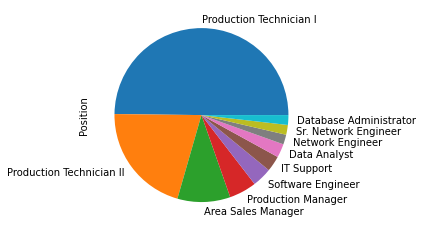

In [89]:
df['Position'].value_counts()[0:10].plot(kind='pie', figsize=(4, 4))

<AxesSubplot:ylabel='RecruitmentSource'>

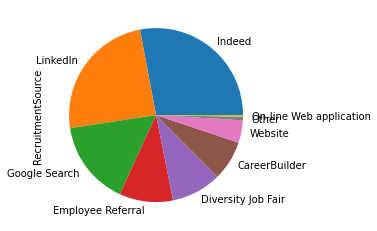

In [90]:
df['RecruitmentSource'].value_counts()[0:10].plot(kind='pie', figsize=(4, 4))

In [92]:
df['Termd'].value_counts(dropna=False) # 「０:！辞職」「１：辞職」
# dropna引数（初期値 True）は欠損値の扱いを制御する引数

0    207
1    104
Name: Termd, dtype: int64

## 前処理
---

機械学習で使われる多くのモデリング手法は文字列の値を訓練データとして使用することは出来ません。

+ ダミー変数
 >ダミー変数とは数字ではないデータを数字に変換する手法をさす。
 > 文字列の値を持つ値をダミー変数に変換
 > + Position（肩書き）
 > + Sex（性別）
 > + MaritalDesc（結婚歴）
 > + RaceDesc（人種）
 > + Department（所属部署）
 > + ManagerName（上司の名前）
 > + RecruitmentSource（採用経由）

In [93]:
# iii) 文字列データを編集（ダミー変数）
dummy_cols = ['Position', 'Sex', 'MaritalDesc', 'RaceDesc', 
              'Department', 'ManagerName', 'RecruitmentSource']
df = pd.get_dummies(df, columns=dummy_cols)
df.shape

(311, 85)

In [94]:
# iv) x:説明変数（特徴量）　y：目的変数　へ分割
x = df.drop(['Termd'], axis=1) #Termd以外は特徴量
y = df['Termd'] # 従業員の辞職を示すカラムTermd
x.shape, y.shape

((311, 84), (311,))

In [95]:
# v） train:訓練データ　test:テストデータ　へ分割
seed = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((217, 84), (94, 84), (217,), (94,))

In [98]:
# vi) 目的変数（カラムTermdの値）の分布を確認
pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1)

,Termd,Termd
0,141,66
1,76,28


    訓練データ（y_train）には、辞職76名、現職141名。
    テストデータ（y_test）には辞職2８名、現職66名なのが確認できます。

## ⓪ベースライン
---

+ XGBoost（XGBoostは勾配ブースティングのフレームワーク）を使い人事データセットの説明変数を用いて退職の有無（カラムTermd）を分類推測を行う。
>勾配ブースティングの学習プロセスは繰り返し処理（イテレーション）
>一つ前の学習結果の誤差を繰り返し学習する手法

+ XGBoostのハイパーパラメータの数は細かいのを含めると50以上。
> 中でも特にモデリングに影響の高い以下のハイパーパラメータの調整を行う。
> + min_child_weight
> + max_depth
> + colsample_bytree
> + subsample


In [100]:
# vii) XGBoostへ設定するハイパーパラメータを辞書型で作成
params = {'metric':'error',
          'objective':'binary:logistic',
          'n_estimators':50000,     #何回繰り返すか?
          'booster': 'gbtree',
          'learning_rate':0.01,
          'min_child_weight':1,
          'max_depth':5,
          'random_state':seed,
          'colsample_bytree':1,
          'subsample':1,
         }

In [102]:
# viii) ベースライン（モデル）の訓練
cls = xgb.XGBClassifier()
cls.set_params(**params)
cls.fit(x_train,
        y_train,
        early_stopping_rounds=50, # 50回以上モデル改善ない場合に学習プロセス停止　#学習完了毎時テストデータモデルの評価を実行、評価指標が一定の回数を改善しなくなった時点で学習ストップ
        eval_set=[(x_test, y_test)],
        eval_metric='error',
        verbose=1)

[22:08:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.28723
[1]	validation_0-error:0.28723
[2]	validation_0-error:0.27660
[3]	validation_0-error:0.28723
[4]	validation_0-error:0.27660
[5]	validation_0-error:0.27660
[6]	validation_0-error:0.27660
[7]	validation_0-error:0.27660
[8]	validation_0-error:0.27660
[9]	validation_0-error:0.24468
[10]	validation_0-error:0.24468


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11]	validation_0-error:0.24468
[12]	validation_0-error:0.24468
[13]	validation_0-error:0.24468
[14]	validation_0-error:0.24468
[15]	validation_0-error:0.23404
[16]	validation_0-error:0.24468
[17]	validation_0-error:0.24468
[18]	validation_0-error:0.24468
[19]	validation_0-error:0.24468
[20]	validation_0-error:0.24468
[21]	validation_0-error:0.24468
[22]	validation_0-error:0.24468
[23]	validation_0-error:0.24468
[24]	validation_0-error:0.24468
[25]	validation_0-error:0.24468
[26]	validation_0-error:0.24468
[27]	validation_0-error:0.26596
[28]	validation_0-error:0.24468
[29]	validation_0-error:0.26596
[30]	validation_0-error:0.27660
[31]	validation_0-error:0.27660
[32]	validation_0-error:0.27660
[33]	validation_0-error:0.27660
[34]	validation_0-error:0.27660
[35]	validation_0-error:0.27660
[36]	validation_0-error:0.27660
[37]	validation_0-error:0.27660
[38]	validation_0-error:0.27660
[39]	validation_0-error:0.27660
[40]	validation_0-error:0.27660
[41]	validation_0-error:0.27660
[42]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5, metric='error',
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50000, n_jobs=8, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [103]:
print('best score : ', cls.best_score)    # 最もスコアが良かった回のスコア
print('best iter : ', cls.best_iteration)    # 最もスコアが良かった回数

best score :  0.234043
best iter :  15


In [107]:
# ix) 予測 正解率 混同行列
pred_1 = cls.predict(x_test)

baseline = accuracy_score(y_test, pred_1)
print(baseline)

confusion_matrix(y_test, pred_1)

0.7659574468085106


array([[61,  5],
       [17, 11]])

今回使用したハイパーパラメータの値では正解率は ```7６.59%``` となっているのが確認できる。

---

## ①グリッドサーチ（GridSearch）
> ハイパーパラメータをチューニング手法（GridSearchCV）でチューニング


In [111]:
# x） グリッドサーチ ： 16通り(2×2×2×2)の異なるハイパーパラメータの値を持つXGBoostの分類器の訓練
cv_params = {'metric':['error'],    # [検証非対称]検証する対象ではないので1つの値のみを設定
             'objective':['binary:logistic'],    # [検証非対称]
             'n_estimators':[50000],
             'random_state':[seed],
             'booster': ['gbtree'],
             'learning_rate':[0.01],
             'min_child_weight':[1,5],    # [検証対称]検証するハイパーパラメータには複数の候補値を設定　２つ
             'max_depth':[1,3],    # [検証対称]２つ
             'colsample_bytree':[0.5,1.0],    # [検証対称]２つ
             'subsample':[0.5,1.0]    # [検証対称]２つ
            }

cls = xgb.XGBClassifier()
# Scikit-learnのGridSearchCV関数(CV:Cross Validation/交差検証)
cls_grid = GridSearchCV(cls, cv_params, cv=KFold(2, random_state=seed), scoring='accuracy', iid=False)
cls_grid.fit(x_train,
             y_train,
             early_stopping_rounds=50,
             eval_set=[(x_test, y_test)],
             eval_metric='error',
             verbose=0)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[22:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through t

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mon...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             iid=False,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.5, 1.0],
     

In [117]:
print(cls_grid.best_params_) # 交差検証で得た最も評価スコアが良いハイパーパラメータの値を戻す
print('best score : ', cls_grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 1, 'metric': 'error', 'min_child_weight': 1, 'n_estimators': 50000, 'objective': 'binary:logistic', 'random_state': 42, 'subsample': 1.0}
best score :  0.6819571865443426


In [118]:
# xi) 予測 正解率 混同行列
pred_2 = cls_grid.best_estimator_.predict(x_test)

grid_score = accuracy_score(y_test, pred_2)
print(grid_score)

confusion_matrix(y_test, pred_2) # モデルがどのような推測結果を戻したのか混同行列で確認

0.6914893617021277


array([[58,  8],
       [21,  7]])

今回使用したハイパーパラメータの値では正解率は ```６9.14%``` となっているのが確認できる。

---

## ②ランダムサーチ（RandomizedSearchCV）



In [120]:
# xii) ランダムサーチ
# グリッドサーチでは各パラメータで2つずつの候補、今回はそれぞれ10個の候補の値を指定
cv_params = {'metric':['error'],
             'objective':['binary:logistic'],
             'n_estimators':[50000],
             'random_state':[seed],
             'boosting_type': ['gbdt'],
             'learning_rate':[0.01],
             'min_child_weight':[1,2,3,4,5,6,7,8,9,10],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
             'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
            }
 
cls = xgb.XGBClassifier()
cls_rdn = RandomizedSearchCV(cls,
                             cv_params,
                             cv=KFold(2, random_state=seed),
                             random_state=seed,
                             n_iter=30,
                             iid=False,
                             scoring='accuracy')
cls_rdn.fit(x_train,
            y_train,
            early_stopping_rounds=50,
            eval_set=[(x_test, y_test)],
            eval_metric='error',
            verbose=0)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=n...
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                      

In [122]:
print(cls_rdn.best_params_)
print('best score : ', cls_rdn.best_score_)

{'subsample': 0.7, 'random_state': 42, 'objective': 'binary:logistic', 'n_estimators': 50000, 'min_child_weight': 3, 'metric': 'error', 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}
best score :  0.6728253482840638


In [128]:
# xiii) 予測 正解率 混同行列
pred_3 = cls_rdn.best_estimator_.predict(x_test)

rdn_score = accuracy_score(y_test, pred_3)
print(rdn_score)

confusion_matrix(y_test, pred_3)

0.7021276595744681


array([[63,  3],
       [25,  3]])

今回使用したハイパーパラメータの値では正解率は ```70.21%``` となっているのが確認できる。

---

## ③ベイズ最適化（BayesianOptimization）
> ベイズ最適化ではオープンソースのライブラリが複数ある。
> 今回は、「BayesianOptimization」を利用してXGBoostのハイパーパラメータチューニングを行う。

In [124]:
from bayes_opt import BayesianOptimization

ModuleNotFoundError: No module named 'bayes_opt'

In [125]:
!pip install bayesian-optimization

Using legacy 'setup.py install' for bayesian-optimization, since package 'wheel' is not installed.
    Running setup.py install for bayesian-optimization ... done


In [126]:
from bayes_opt import BayesianOptimization

In [136]:
# xiv) ベイズ最適化
# 関数定義：調整を行うハイパーパラメータを引数、モデル訓練・テストデータを使った推測値を算出、正解率の値を戻す関数定義
def xgb_evaluate(min_child_weight, subsample, colsample_bytree, max_depth):
    params = {'metric': 'error',
              'objective':'binary:logistic',
              'n_estimators':50000,
              'random_state':42,
              'boosting_type':'gbdt',
              'learning_rate':0.01,              
              'min_child_weight': int(min_child_weight),
              'max_depth': int(max_depth),
              'colsample_bytree': colsample_bytree,
              'subsample': subsample,
             }
    # 学習
    cls = xgb.XGBClassifier()
    cls.set_params(**params)
    cls.fit(x_train,
            y_train,
            early_stopping_rounds=50,
            eval_set=[(x_test, y_test)],
            eval_metric='error',
            verbose=0)
    # 予測
    pred = cls.predict(x_test)
    score = accuracy_score(y_test, pred)
    return score


# ベイズ最適化
xgb_bo = BayesianOptimization(xgb_evaluate, 
                              {'min_child_weight': (1,20), #  1~20に属する値を候補の値として探索
                               'subsample': (.1,1),
                               'colsample_bytree': (.1,1),
                               'max_depth': (1,50)},
                              random_state=10)

# 検証実行
xgb_bo.maximize(init_points=15, n_iter=50, acq='ei')

|   iter    |  target   | colsam... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------
[23:30:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  1        |  0.7021   |  0.7942   |  2.017    |  13.04    |  0.7739   |
[23:30:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  2        |  0.7128   |  0.5487   

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  16       |  0.7021   |  0.307    |  10.31    |  9.909    |  0.2194   |
[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  17       |  0.7128   |  0.3347   |  10.67    |  2.683    |  0.7664   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  18       |  0.7128   |  0.412    |  10.53    |  3.957    |  0.3491   |
[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  19       |  0.7128   |  0.5553   |  10.66    |  3.873    |  0.4606   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  20       |  0.7128   |  0.3058   |  10.62    |  3.284    |  0.5617   |
[23:30:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  21       |  0.7021   |  0.5597   |  11.52    |  4.557    |  0.2626   |
[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric 

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  23       |  0.7021   |  0.344    |  10.61    |  3.736    |  0.7973   |
[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  24       |  0.7021   |  0.7452   |  11.87    |  4.812    |  0.6237   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  25       |  0.6915   |  0.7027   |  13.35    |  4.849    |  0.9569   |
[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  26       |  0.6809   |  0.7443   |  14.11    |  2.721    |  0.7304   |
[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  27       |  0.7021   |  0.3111   |  7.385    |  11.34    |  0.8468   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  28       |  0.7021   |  0.4644   |  3.156    |  12.22    |  0.7487   |
[23:30:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  29       |  0.7128   |  0.2681   |  10.69    |  3.755    |  0.3299   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  30       |  0.7128   |  0.3511   |  23.88    |  3.756    |  0.6285   |
[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  31       |  0.7021   |  0.6646   |  41.94    |  10.5     |  0.6402   |
[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric 

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  33       |  0.7128   |  0.4961   |  10.66    |  3.406    |  0.4328   |
[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  34       |  0.7021   |  0.5225   |  48.4     |  9.495    |  0.2438   |
[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  35       |  0.7021   |  0.2777   |  10.75    |  3.698    |  0.1895   |
[23:30:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  36       |  0.7021   |  0.3795   |  17.43    |  19.94    |  0.503    |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  37       |  0.7021   |  0.1816   |  13.85    |  2.209    |  0.6283   |
[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  38       |  0.6915   |  0.5071   |  12.18    |  4.553    |  0.8455   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  39       |  0.7021   |  0.7387   |  11.2     |  13.16    |  0.6883   |
[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  40       |  0.7021   |  0.6329   |  39.13    |  16.9     |  0.6714   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  41       |  0.7128   |  0.3576   |  24.32    |  1.113    |  0.1111   |
[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  42       |  0.7128   |  0.4488   |  10.74    |  3.844    |  0.3287   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  43       |  0.7021   |  0.2917   |  10.77    |  2.772    |  0.5657   |
[23:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  44       |  0.7128   |  0.4592   |  10.68    |  3.342    |  0.4943   |
[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  45       |  0.7128   |  0.4119   |  23.86    |  3.868    |  0.4934   |
[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  46       |  0.7128   |  0.1175   |  33.83    |  6.765    |  0.9709   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  47       |  0.7128   |  0.3727   |  23.98    |  3.905    |  0.5522   |
[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  48       |  0.7021   |  0.5503   |  24.37    |  1.168    |  0.1249   |
[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  49       |  0.7021   |  0.6766   |  4.251    |  16.46    |  0.9084   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  50       |  0.7021   |  0.3898   |  10.71    |  3.651    |  0.3189   |
[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  51       |  0.7021   |  0.2383   |  39.87    |  18.6     |  0.3088   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  52       |  0.7021   |  0.5986   |  10.43    |  3.836    |  0.446    |
[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  53       |  0.7234   |  0.5404   |  10.61    |  3.327    |  0.3517   |
[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric 

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  55       |  0.7021   |  0.8602   |  36.03    |  15.44    |  0.3559   |
[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  56       |  0.7021   |  0.5759   |  10.4     |  3.182    |  0.2235   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  57       |  0.7021   |  0.1971   |  11.82    |  11.37    |  0.5715   |
[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


|  58       |  0.6915   |  0.2077   |  10.44    |  3.16     |  0.449    |
[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  59       |  0.7021   |  0.7307   |  3.31     |  13.37    |  0.4503   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  60       |  0.7021   |  0.2491   |  24.01    |  4.018    |  0.586    |
[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  61       |  0.7021   |  0.1809   |  49.17    |  13.59    |  0.8824   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  62       |  0.7021   |  0.1711   |  10.66    |  3.349    |  0.5993   |
[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  63       |  0.7128   |  0.6495   |  10.65    |  3.311    |  0.3712   |


/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  64       |  0.7021   |  0.688    |  44.28    |  4.497    |  0.5212   |
[23:30:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


|  65       |  0.7021   |  0.325    |  10.78    |  3.988    |  0.4973   |


In [137]:
optimized_params = xgb_bo.max['params']    # max属性:最評価スコア結果取得
optimized_params['max_depth'] = int(optimized_params['max_depth'])
optimized_params

{'colsample_bytree': 0.540424015123974,
 'max_depth': 10,
 'min_child_weight': 3.326773304833374,
 'subsample': 0.3517043021987626}

In [138]:
# 固定されたハイパーパラメータを変数へ格納
fixed_params = {'metric':'error',
                'objective':'binary:logistic',
                'n_estimators':50000,
                'random_state':seed,
                'booster': 'gbtree',
                'learning_rate':0.01}

# 訓練
cls = xgb.XGBClassifier()
cls.set_params(**fixed_params, **optimized_params)
cls.fit(x_train,
        y_train,
        early_stopping_rounds=50,
        eval_set=[(x_test, y_test)],
        eval_metric='error',
        verbose=0)

[23:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.540424015123974, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              metric='error', min_child_weight=3.326773304833374, missing=nan,
              monotone_constraints='()', n_estimators=50000, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3517043021987626,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
# x) 予測 正解率 混同行列
pred_4 = cls.predict(x_test)

baseline = accuracy_score(y_test, pred_4)
print(baseline)

confusion_matrix(y_test, pred_4)

0.7021276595744681


array([[65,  1],
       [27,  1]])

今回使用したハイパーパラメータの値では正解率は ```70.21%``` となっているのが確認できる。

---